In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [2]:
# X = npr.randint(30,40,1000)

In [30]:
# X = npr.normal(2,10,10)

<Axes: ylabel='Density'>

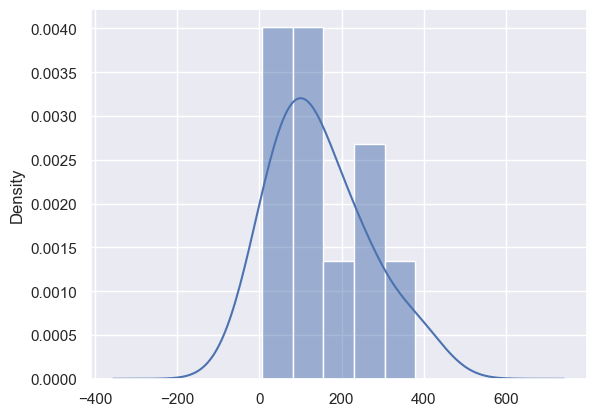

In [75]:
X = npr.gamma(1,100,10)
sns.histplot(X, kde=True, stat="density", kde_kws=dict(cut=5))

In [76]:
np.mean(X)

146.6583775228286

In [77]:
npr.seed(666)

In [78]:
bootstrap_samples = npr.choice(X, size = (10000, len(X)), replace = True)

In [79]:
# bootstrap_samples[44]

In [80]:
bootstrap_means = np.mean(bootstrap_samples, axis=1)

In [81]:
len(bootstrap_means)

10000

### Percentile Bootstrap

CI: $\left[\hat{\theta}_l^*, \hat{\theta}_u^{\star}\right]$

<Axes: ylabel='Density'>

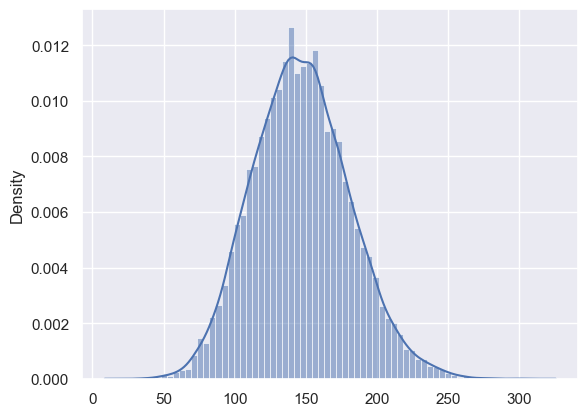

In [82]:
sns.histplot(bootstrap_means, kde=True, stat="density", kde_kws=dict(cut=5))

In [83]:
# percentile bootstrap
np.quantile(bootstrap_means, (0.025,0.975))

array([ 84.29906701, 216.72069278])

In [84]:
# t-interval
np.mean(X) + np.array([-1.96,1.96]) * np.std(X)/np.sqrt(len(X))

array([ 79.28816333, 214.02859172])

### Empirical Bootstrap

CI: $\left[\bar{x}-\delta_l^*, \bar{x}-\delta_r^*\right]$, $\delta^*=\bar{x}^*-\bar{x}$

In [85]:
d_samples = npr.choice(X-np.mean(X), size = (10000, len(X)), replace = True )

In [86]:
d_means = np.mean(d_samples, axis=1)

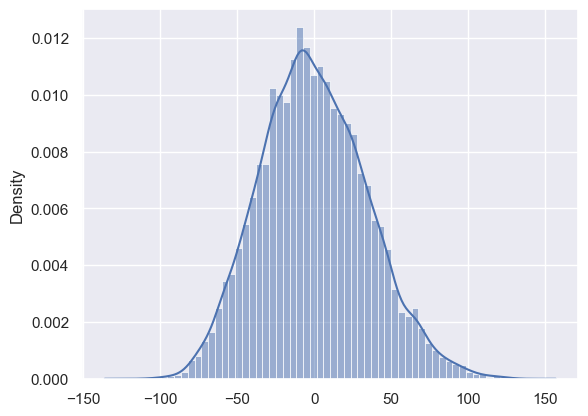

In [87]:
sns.histplot(d_means, kde=True, stat="density", kde_kws=dict(cut=5));

In [88]:
# Empirical bootstrap
np.mean(X) + np.quantile(d_means, (0.025,0.975))

array([ 83.79532784, 218.17380155])

### t-bootstrap

CI: $\left(\widehat{\theta}+t_L s(\widehat{\theta}), \widehat{\theta}+t_U s(\widehat{\theta})\right)$,   $t_{\text {boot }, b}=\frac{\widehat{\theta}-\widehat{\theta}_b^*}{s_b(\widehat{\theta})}$

In [89]:
tt = (np.mean(X)-bootstrap_means)/(np.std(X)/np.sqrt(len(X)))

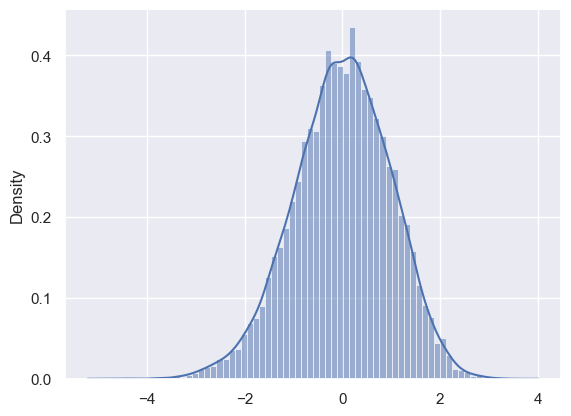

In [90]:
sns.histplot(tt, kde=True, stat="density", kde_kws=dict(cut=5));

In [91]:
np.quantile(tt, (0.025,0.975))

array([-2.03832123,  1.8142179 ])

In [92]:
# t-bootstrap
np.mean(X)+np.quantile(tt, (0.025,0.975))*np.std(X)/np.sqrt(len(X))

array([ 76.59606226, 209.01768803])

In [93]:
# quantile bootstrap
np.quantile(bootstrap_means, (0.025,0.975))

array([ 84.29906701, 216.72069278])

In [94]:
# Empirical bootstrap
np.mean(X) + np.quantile(d_means, (0.025,0.975))

array([ 83.79532784, 218.17380155])

In [95]:
# true t-interval
np.mean(X) + np.array([-1.96,1.96]) * np.std(X)/np.sqrt(len(X))

array([ 79.28816333, 214.02859172])

### Sharpe Ratio

In [96]:
import datetime as dt 
import pandas as pd
import pandas_datareader.data as web

# sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)

In [97]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [98]:
start = dt.datetime(1951,1,1)
end = dt.datetime(2023,1,1)
sp500 = pdr.get_data_yahoo('^GSPC', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [99]:
monthly_dates = pd.date_range(sp500.index.min(), sp500.index.max(), freq='M')

In [100]:
monthly_data = sp500.reindex(monthly_dates, method='ffill')

In [101]:
returns = 100*monthly_data['Adj Close'].pct_change().dropna()

In [ ]:
# returns

In [102]:
def sharpe_ratio(x):
    mu, sigma = 12*x.mean(), np.sqrt(12*x.var())
    return mu/sigma

In [103]:
from arch.bootstrap import IIDBootstrap

In [104]:
# !pip install arch

In [105]:
bs = IIDBootstrap(returns)

In [106]:
bs

IID Bootstrap(no. pos. inputs: 1, no. keyword inputs: 0, ID: 0x7fd439fb6790)

In [107]:
bs.conf_int(sharpe_ratio, 10000, method='basic')

array([[0.33039169],
       [0.81561307]])

In [108]:
bs.conf_int(sharpe_ratio, 10000, method='percentile')

array([[0.34104636],
       [0.81356861]])

In [ ]:
# bs.conf_int(sharpe_ratio, 10000, method='studentized')

In [109]:
bs.conf_int(sharpe_ratio, 10000, method='norm')

array([[0.33306169],
       [0.81712734]])

In [110]:
# bs.conf_int(sharpe_ratio, 10000, method='bc')

array([[0.33153466],
       [0.81682546]])

In [113]:
res = bs.apply(sharpe_ratio, 10000)

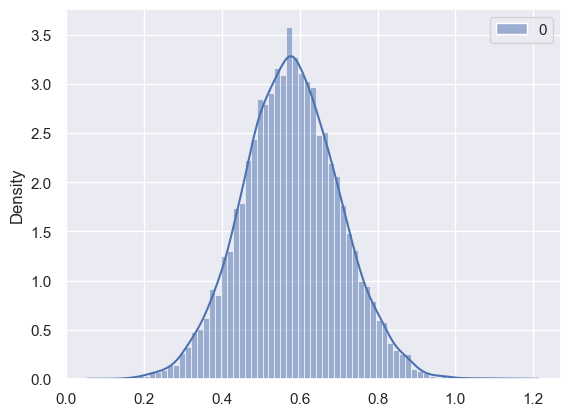

In [114]:
sns.histplot(res, kde=True, stat="density", kde_kws=dict(cut=5));

In [115]:
sharpe_ratio(returns)

0.5750945156204604

In [116]:
bs.conf_int(sharpe_ratio, 10000, method='basic')-0.575

array([[-0.24898059],
       [ 0.23467626]])

#### CI for maximum 

In [117]:
u = npr.normal(0,100,40)
x = np.arange(40)
y = 2+40*x-x**2+u

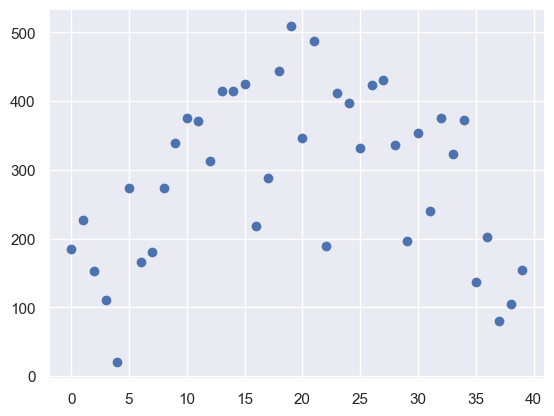

In [118]:
plt.scatter(x, y)

In [121]:
bs = IIDBootstrap(y)

In [122]:
bs

IID Bootstrap(no. pos. inputs: 1, no. keyword inputs: 0, ID: 0x7fd439f05010)

In [123]:
np.max(y)

509.0268145215004

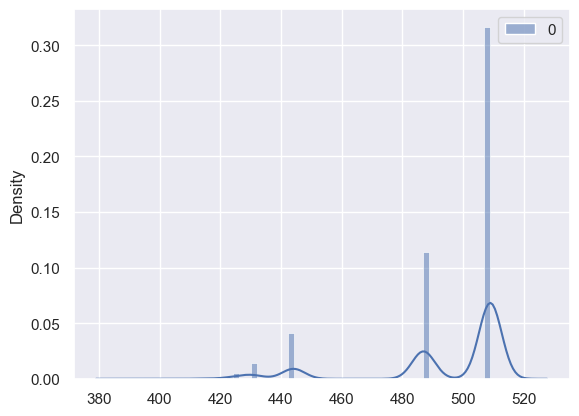

In [125]:
res = bs.apply(np.max, 10000)
sns.histplot(res, kde=True, stat="density", kde_kws=dict(cut=5));

In [126]:
bs.conf_int(np.max, 10000, method='percentile')

array([[430.55362809],
       [509.02681452]])

In [127]:
bs.conf_int(np.max, 10000, method='percentile')-np.max(y)

array([[-78.47318643],
       [  0.        ]])

In [128]:
bs.conf_int(np.max, 10000, method='basic')

array([[509.02681452],
       [587.50000095]])

In [129]:
bs.conf_int(np.max, 10000, method='basic')-np.max(y)

array([[ 0.        ],
       [78.47318643]])

In [130]:
bs.conf_int(np.max, 10000, method='norm')

array([[462.55742271],
       [555.49620633]])

In [131]:
bs.conf_int(np.max, 10000, method='norm')-np.max(y)

array([[-45.99693126],
       [ 45.99693126]])

In [132]:
bs.conf_int(np.max, 10000, method='bc')

array([[423.64475297],
       [509.02681452]])

In [133]:
bs.conf_int(np.max, 10000, method='bc')-np.max(y)

array([[-85.38206156],
       [  0.        ]])

In [134]:
bs.conf_int(np.max, 10000, method='bca')

array([[430.55362809],
       [509.02681452]])

In [135]:
bs.conf_int(np.max, 10000, method='bca')-np.max(y)

array([[-78.47318643],
       [  0.        ]])